In [14]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker
import seaborn as sns
sns.set()

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
sns.set_context("notebook",font_scale = 1.5, rc = {"figure.figsize": (11, 8), 
        "axes.titlesize": 18 } )

In [18]:
from matplotlib import rcParams
rcParams["figure.figsize"] = 11,8

In [25]:
dataset = pd.read_csv('D:\data-science-practice\mlcourse\data\cardio_train.csv', sep = ";")

In [26]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [27]:
dataset.shape

(70000, 13)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [30]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


### EDA for numerical features:

In [31]:
#age,height,weight,ap_hi,ap_lo are numerical features

In [33]:
dataset["age in yrs"] = (dataset["age"]/ 365).round().astype("int")

In [34]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age in yrs
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


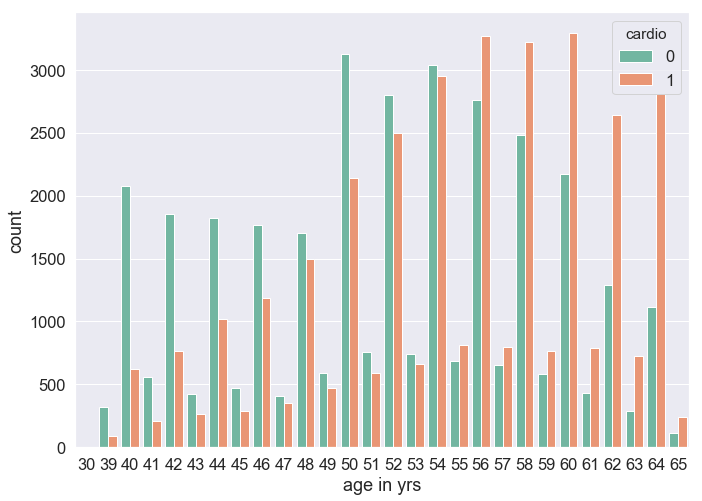

In [39]:
sns.countplot(x="age in yrs", hue = "cardio", data = dataset, palette = "Set2")

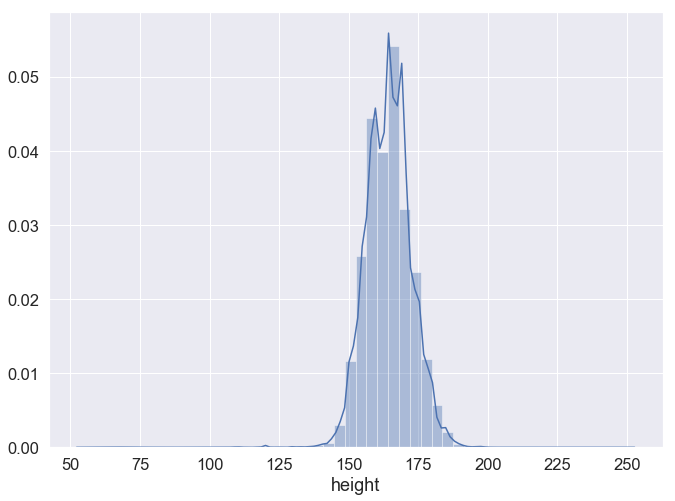

In [56]:
sns.distplot(dataset["height"])

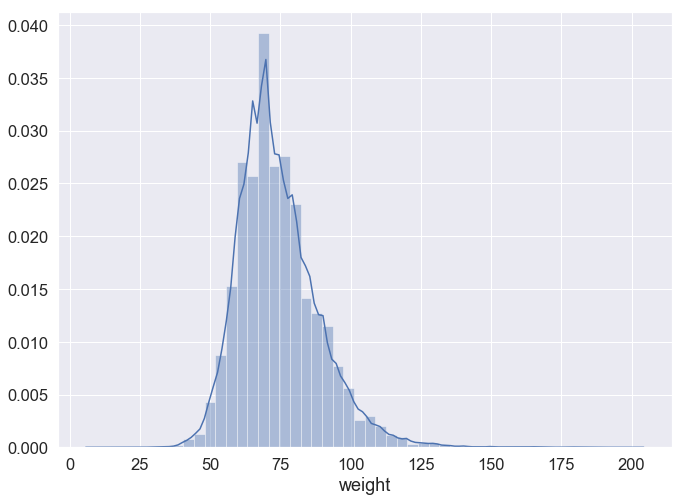

In [57]:
sns.distplot(dataset["weight"])

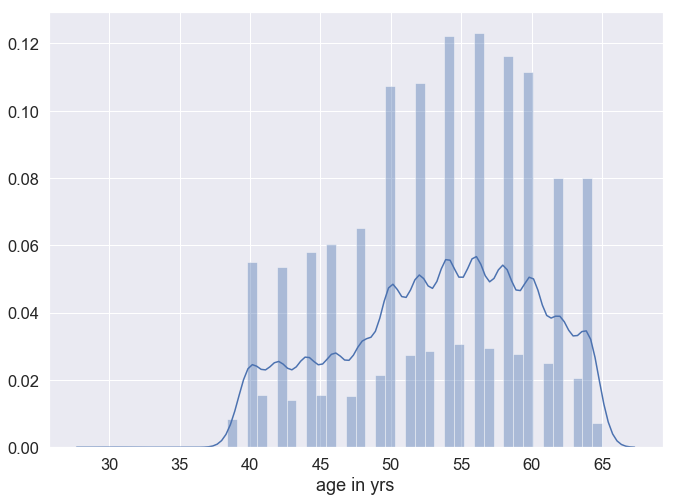

In [58]:
sns.distplot(dataset["age in yrs"])

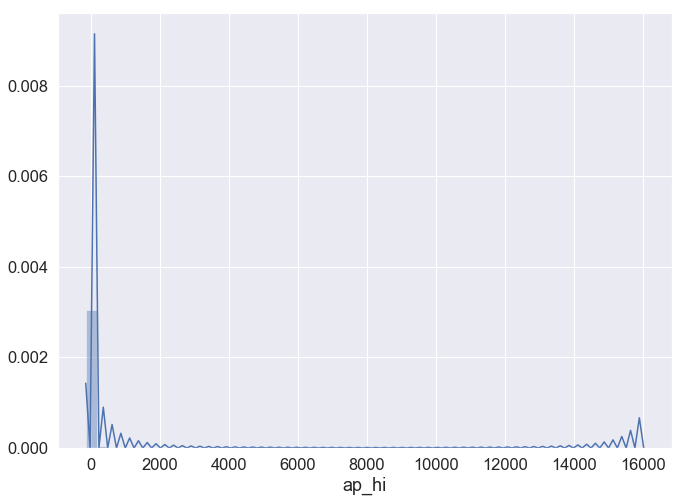

In [59]:
sns.distplot(dataset["ap_hi"])

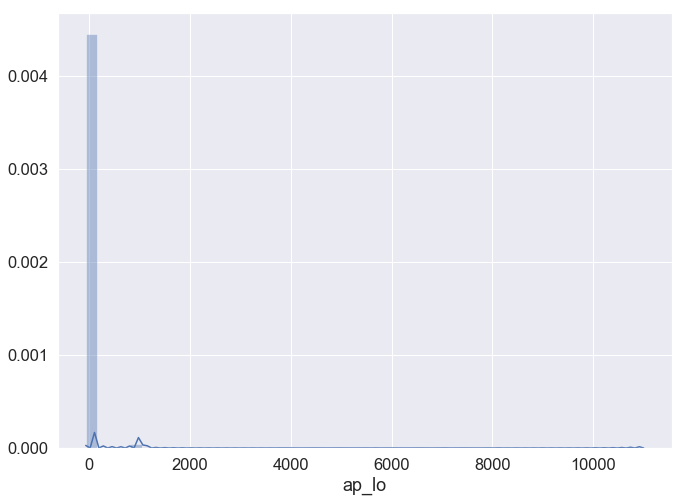

In [60]:
sns.distplot(dataset["ap_lo"])

### EDA for categorical features:

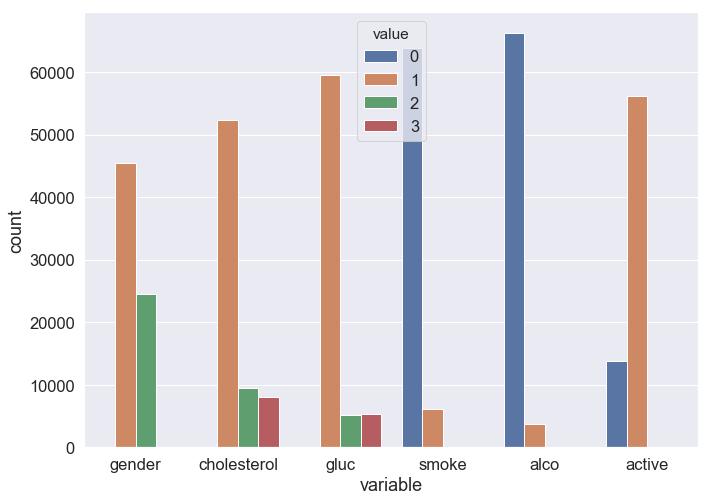

In [72]:
df_categorical = dataset.loc[:,['gender','cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical))

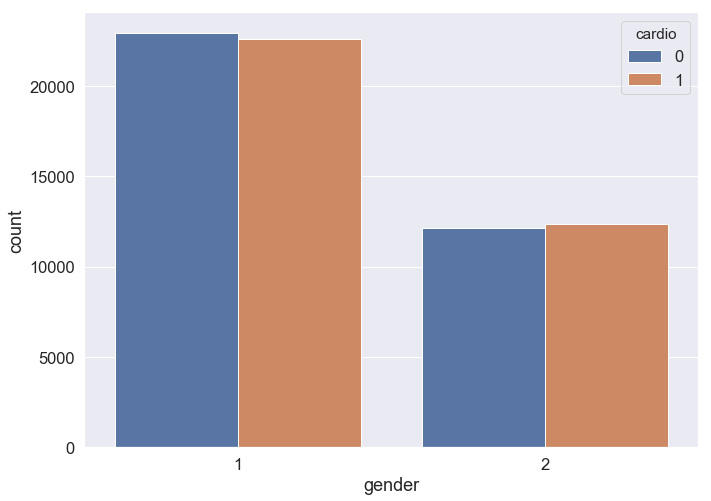

In [62]:
sns.countplot(x="gender", hue = "cardio", data = dataset)

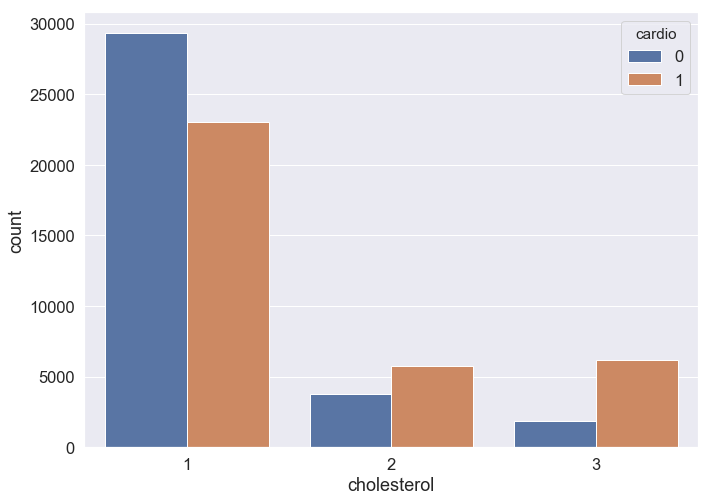

In [64]:
sns.countplot(x = "cholesterol", hue = "cardio", data = dataset)

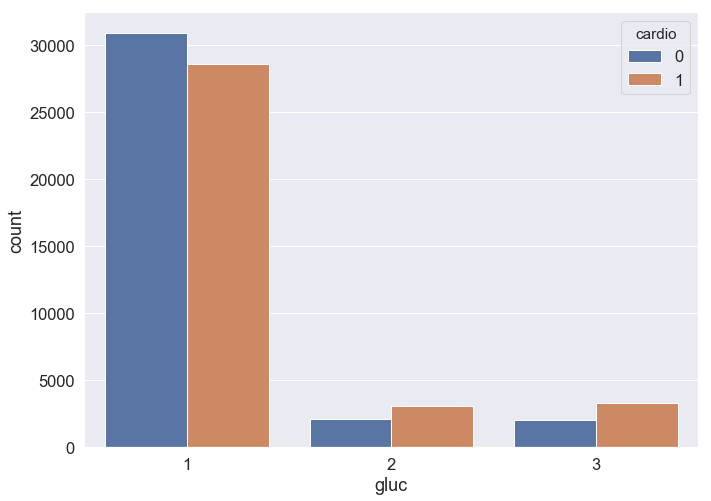

In [65]:
sns.countplot(x = "gluc" , hue = "cardio", data = dataset)

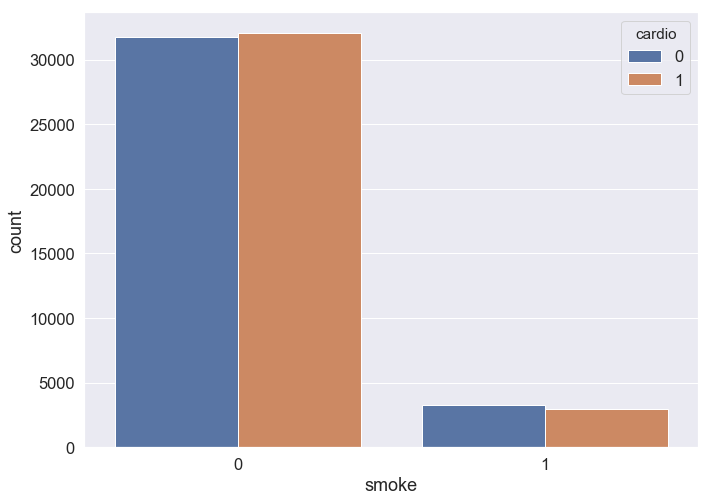

In [66]:
sns.countplot(x= "smoke" , hue = "cardio", data = dataset)

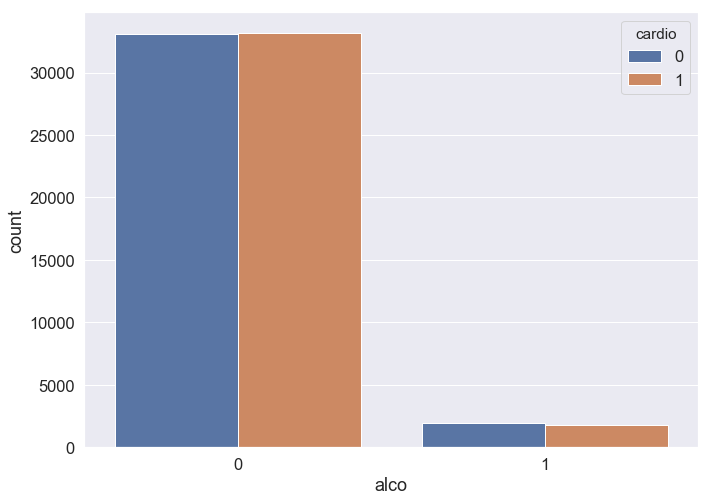

In [67]:
sns.countplot(x= "alco", hue = "cardio", data = dataset)

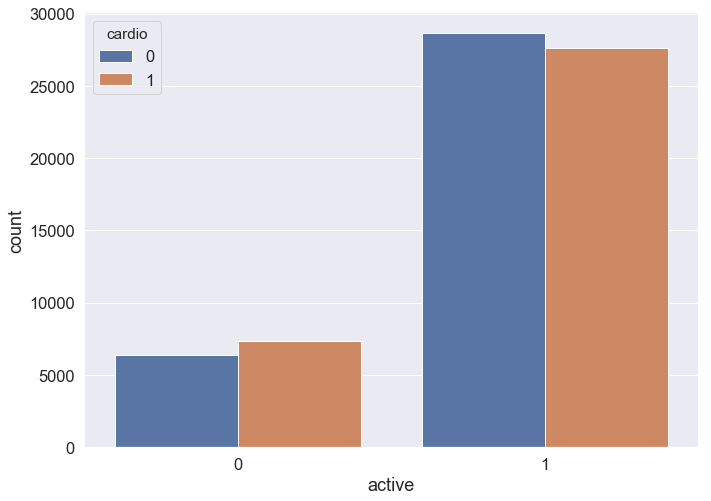

In [68]:
sns.countplot(x = "active", hue = "cardio", data = dataset)

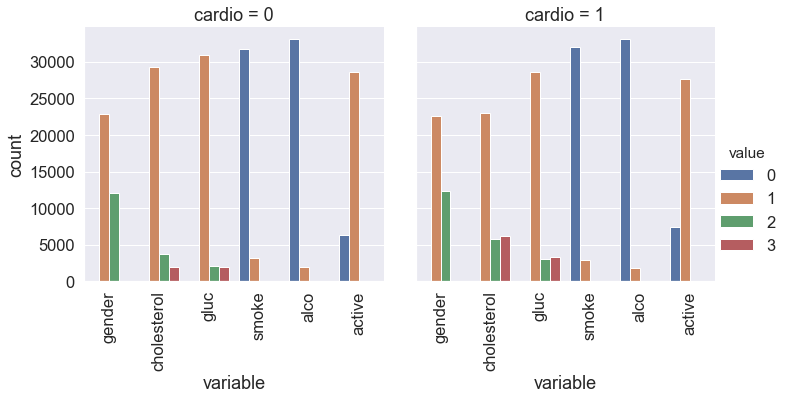

In [78]:
df_long = pd.melt(dataset, id_vars=['cardio'], value_vars=['gender','cholesterol','gluc', 'smoke', 'alco', 'active'])
grid = sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count")
grid.set_xticklabels(rotation=90)


In [80]:
dataset.groupby("gender")["height"].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [88]:
dataset.groupby("gender")["alco"].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

In [87]:
dataset.groupby("gender")["smoke"].sum()

gender
1     813
2    5356
Name: smoke, dtype: int64

In [91]:
dataset.groupby("gender")["active"].sum()

gender
1    36516
2    19745
Name: active, dtype: int64

#### Removing outliers in heights and weights coulmn:

In [92]:
dataset.drop(dataset[(dataset['height'] > dataset['height'].quantile(0.975)) | (dataset['height'] < dataset['height'].quantile(0.025))].index,inplace=True)
dataset.drop(dataset[(dataset['weight'] > dataset['weight'].quantile(0.975)) | (dataset['weight'] < dataset['weight'].quantile(0.025))].index,inplace=True)

In [95]:
dataset[dataset["ap_hi"] < dataset["ap_lo"]].shape[0]

1082

In [96]:
dataset.drop(dataset[(dataset['ap_hi'] > dataset['ap_hi'].quantile(0.975)) | (dataset['ap_hi'] < dataset['ap_hi'].quantile(0.025))].index,inplace=True)
dataset.drop(dataset[(dataset['ap_lo'] > dataset['ap_lo'].quantile(0.975)) | (dataset['ap_lo'] < dataset['ap_lo'].quantile(0.025))].index,inplace=True)

In [97]:
dataset[dataset['ap_lo']> dataset['ap_hi']].shape[0]

0

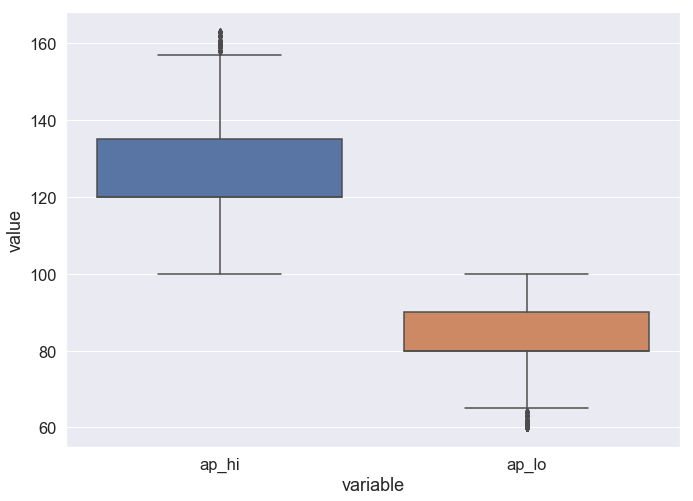

In [100]:
sns.boxplot(x ="variable", y = "value", data = dataset[["ap_hi","ap_lo"]].melt())

### Multivariate Analysis:

In [107]:
dataset[["age in yrs","height","weight","ap_hi","ap_lo","cholesterol","gluc"]].corr() 

,age in yrs,height,weight,ap_hi,ap_lo,cholesterol,gluc
age in yrs,1.000000,-0.082459,0.063380,0.203947,0.146493,0.152215,0.096510
height,-0.082459,1.000000,0.248384,-0.011065,0.007334,-0.069320,-0.030216
weight,0.063380,0.248384,1.000000,0.231199,0.210857,0.129315,0.087540
ap_hi,0.203947,-0.011065,0.231199,1.000000,0.695679,0.187134,0.082746
ap_lo,0.146493,0.007334,0.210857,0.695679,1.000000,0.146835,0.061281
cholesterol,0.152215,-0.069320,0.129315,0.187134,0.146835,1.000000,0.454124
gluc,0.096510,-0.030216,0.087540,0.082746,0.061281,0.454124,1.000000
